In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Fonksyon

In [12]:
#barplot kantite liv yo
def bar_kantite(x,y,df,tit):
    ax = sns.barplot(x=x, y=y, data=df,palette='Oranges_r')
    ax.set_xlabel('Nombre de livres ')
    plt.title(tit)
    sns.despine(left=True, bottom=True)


    for p in ax.patches:
            percentage =  p.get_width()
            x = p.get_x() + p.get_width()/1
            y = p.get_y() + p.get_height()/1.5
            ax.annotate(percentage, (x, y),fontsize=10,color="black")

In [14]:
#barplot pousantaj liv  yo
def bar_pousantaj(x,y,df,tit):
    ax = sns.barplot(x=x, y=y, data=df,palette='Oranges_r')
    ax.set_xlabel('Nombre de livres ')
    plt.title(tit)
    sns.despine(left=True, bottom=True)

    total = df[x].sum(axis=0)
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=10,color="black")

In [15]:
# pie plot ak pousantaj
def pie_plot(df,x,y,tit):
    df[x].plot(kind='pie',autopct="%.1f%%",labels=df[y])
    plt.title(tit, fontsize=15)

In [16]:
# efase varyab ki nil yo
def del_kategori_nil(df,x,df1):
    dfindex=df[df[x]==0].index
    df1=df.drop(dfindex)

### Data Preparation

In [32]:
#li fichye a
df1 = pd.read_csv('Informations_generales_3.csv')

In [33]:
df1.head()

,Biblio,Nbre_livres,nbr_livres_etr,nbr_livres_ht,generalite,generalht,philosophie,philoht,religion,religionht,...,Poesie,poesieht,Théâtre,teyatht,Biographie,Biographie_ht,BD,BD_ht,Albums,Albums_ht
0,Centre Culturel et de Recherche pour l'épanoui...,2680,1494,1186,62,16,139,20,54,7,...,0,0,0,0,63,23,0,0,0,0
1,Amis Lecteurs de Port Salut,1512,1512,0,52,0,21,0,25,0,...,109,0,6,0,0,0,0,0,0,0
2,Bibliotaptap,1466,931,535,0,0,27,0,7,2,...,33,84,17,7,0,0,0,0,0,0
3,Centre Culturel Pyepoudre,5229,5229,0,104,0,74,0,31,0,...,585,0,41,0,0,0,0,0,0,0
4,Bibliothèque Monique Calixte,14749,13765,3852,343,39,304,37,60,39,...,342,505,570,64,257,75,495,318,1941,114


In [34]:
df1.columns

Index(['Biblio', 'Nbre_livres', 'nbr_livres_etr', 'nbr_livres_ht',
       'generalite', 'generalht', 'philosophie', 'philoht', 'religion',
       'religionht', 'scssociales', 'socialeht', 'langues ', 'langht',
       'scsnature', 'scsnatureht', 'technique', 'techniqueht', 'art', 'art ht',
       'Litt', 'litht', 'geohist', 'geohist ht', 'Roman', 'Romanht', 'Romanj',
       'Romanjht', 'Conte', 'conteht', 'Poesie', 'poesieht', 'Théâtre',
       'teyatht', 'Biographie', 'Biographie_ht', 'BD', 'BD_ht', 'Albums',
       'Albums_ht'],
      dtype='object')

In [35]:
#lis tout kategori ki etranje ak non biblio yo
listet=['Biblio','generalite','philosophie','religion','scssociales','langues ','scsnature','technique','art','Litt','geohist','Roman','Romanj','Conte','Poesie','Théâtre','Biographie','BD','Albums']

In [36]:
#lis tout kategori ki etranje
listet2=['generalite','philosophie','religion','scssociales','langues ','scsnature','technique','art','Litt','geohist','Roman','Romanj','Conte','Poesie','Théâtre','Biographie','BD','Albums']

In [37]:
listnbliv=['Nbre_livres', 'nbr_livres_etr', 'nbr_livres_ht']

In [42]:
listht=['Biblio','generalht','philoht','religionht','socialeht','langht','scsnatureht','techniqueht','art ht','litht','geohist ht','Romanht','Romanjht','conteht','poesieht','teyatht','Biographie_ht','BD_ht','Albums_ht']

In [43]:
listht2=['generalht','philoht','religionht','socialeht','langht','scsnatureht','techniqueht','art ht','litht','geohist ht','Romanht','Romanjht','conteht','poesieht','teyatht','Biographie_ht','BD_ht','Albums_ht']

In [38]:
#dataframe kategori etranje yo
df3=df1[listet]

In [44]:
#dataframe kategori ayisyen yo
df4=df1[listht]

In [56]:
#dataframe distribisyon anndan chak biblio
df5=df1.T

In [70]:
df5.head()

,CCREJ,Port-Salut,Taptap,Pyepoudre,BMC,Deschapelles,Trois_Dumas,Fond-des-Blancs,BIJARC,Pestel,CCKD,Rasin_lespwa,Fond-parisien,IPDEC,varyab
0,2680,1512,1466,5229,14749,3907,6439,790,827,1146,7750,3566,4276,5487,Nbre_livres
1,1494,1512,931,5229,13765,2582,5853,790,827,941,6186,2448,2952,4683,nbr_livres_etr
2,1186,0,535,0,3852,1325,586,0,0,205,1564,1118,1324,804,nbr_livres_ht
3,62,52,0,104,343,116,240,30,35,30,139,156,105,466,generalite
4,16,0,0,0,39,23,0,0,0,0,7,14,0,0,generalht


In [49]:
listcol=df1['Biblio'].to_list()

In [58]:
df5.set_axis(listcol, axis='columns', inplace=True)

In [60]:
df5.drop(['Biblio'],inplace=True)

In [62]:
df5['Varyab'] = df5.index

In [64]:
df5.reset_index(drop=True, inplace=True)

In [67]:
colbiblio=['CCREJ','Port-Salut','Taptap','Pyepoudre','BMC','Deschapelles','Trois_Dumas','Fond-des-Blancs','BIJARC','Pestel','CCKD','Rasin_lespwa','Fond-parisien','IPDEC','varyab']

In [72]:
colbiblio2=['CCREJ','Port-Salut','Taptap','Pyepoudre','BMC','Deschapelles','Trois_Dumas','Fond-des-Blancs','BIJARC','Pestel','CCKD','Rasin_lespwa','Fond-parisien','IPDEC']

In [69]:
df5.columns=colbiblio

In [86]:
df6=df5.drop([0, 1,2])

In [108]:
#etranje
dfetr=df6.drop([4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38])

In [102]:
#ayisyen
dfht=df6.drop([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37])

### Analyse

#### Distribution nombre de livres par Biblio

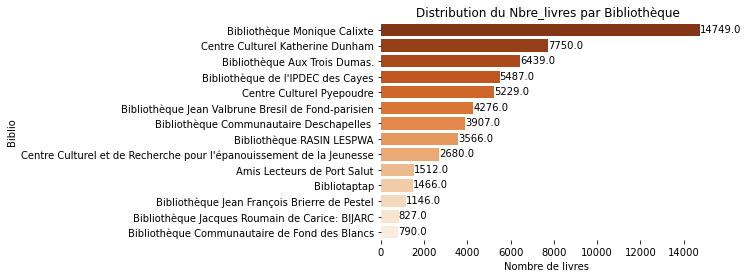

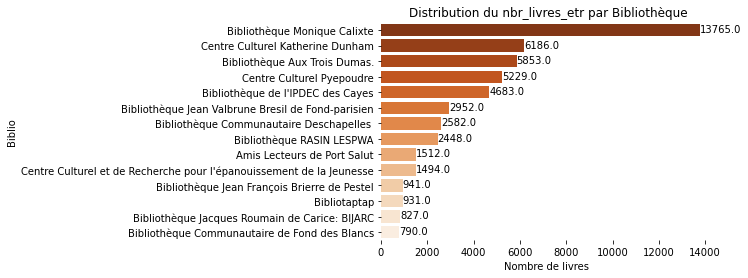

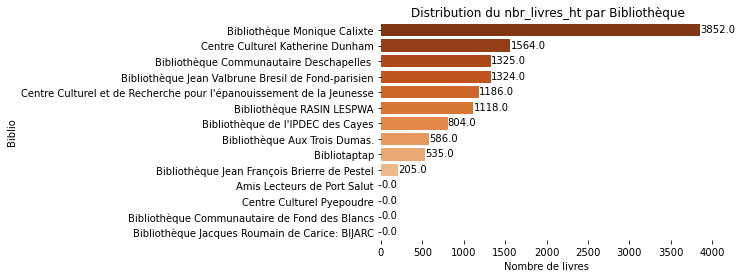

In [39]:
for i in listnbliv:
    df3=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_kantite(i,'Biblio',df3,'Distribution du {} par Bibliothèque'.format(i))   

#### Distribution Categorie etrangere par Biblio

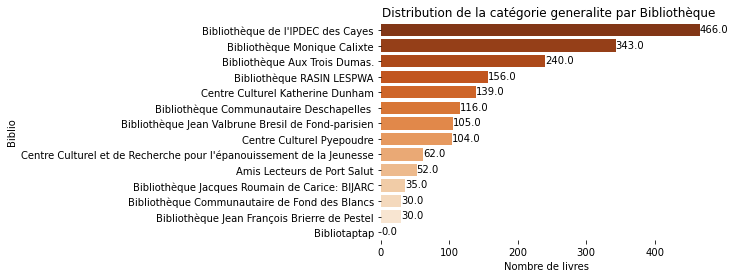

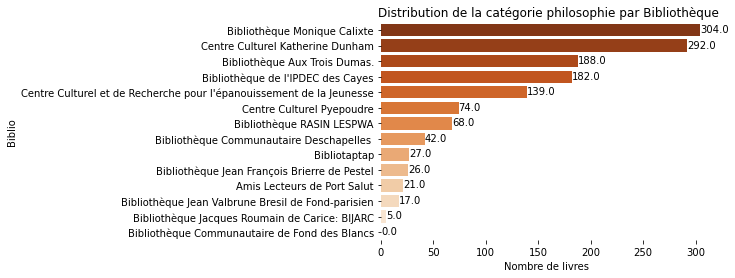

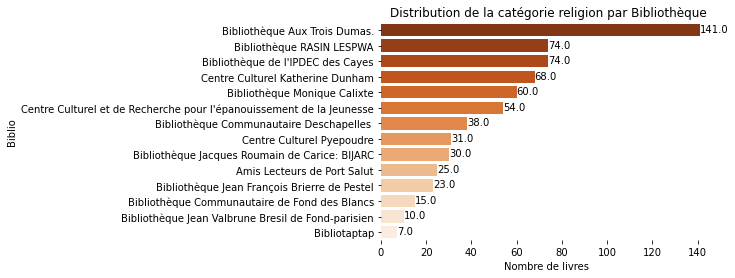

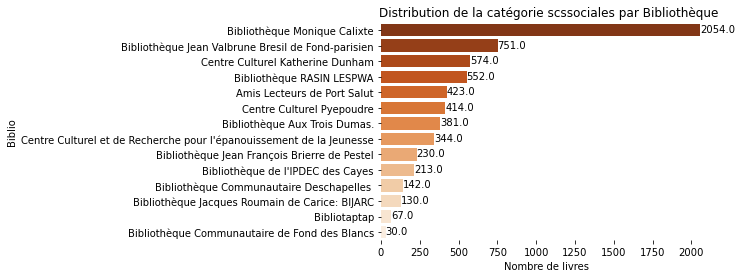

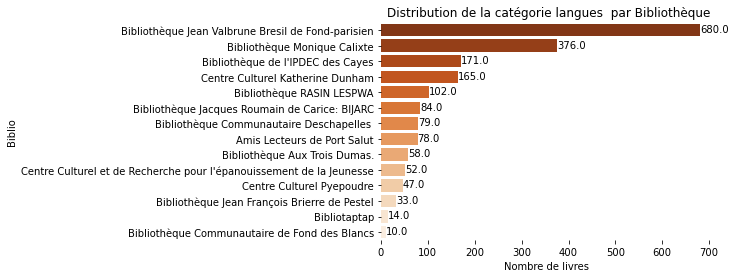

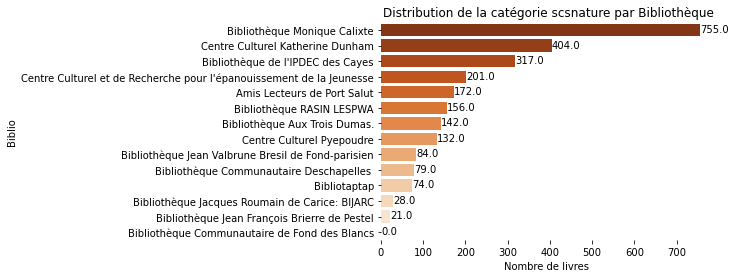

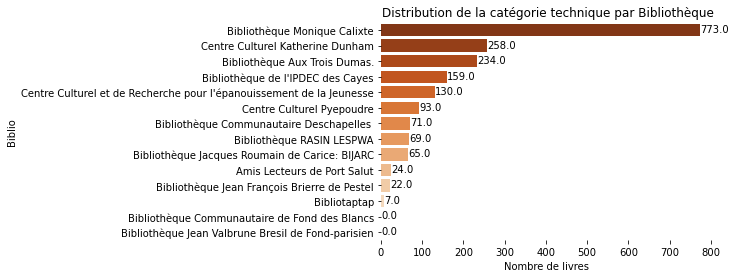

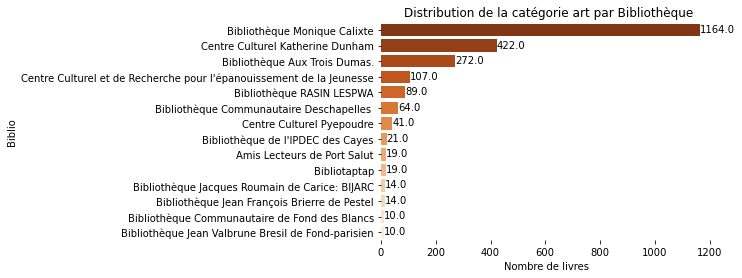

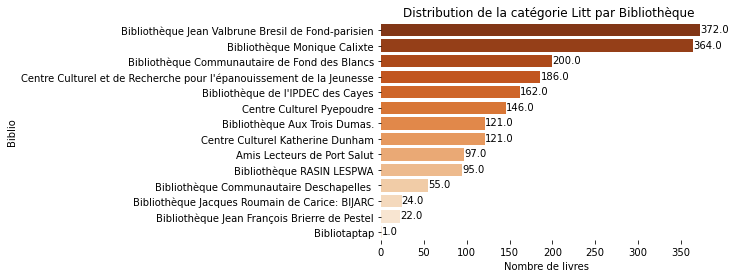

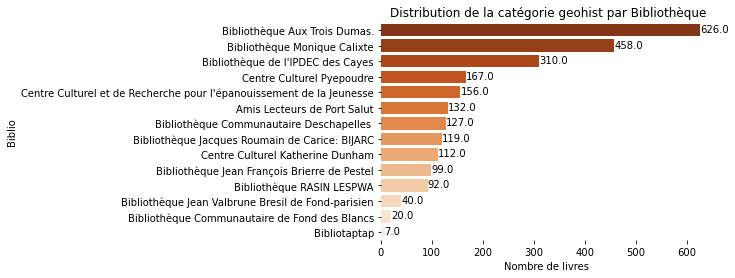

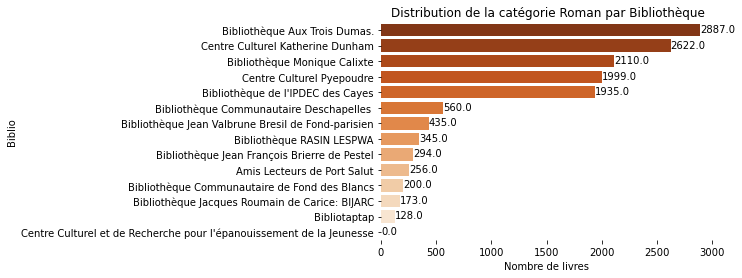

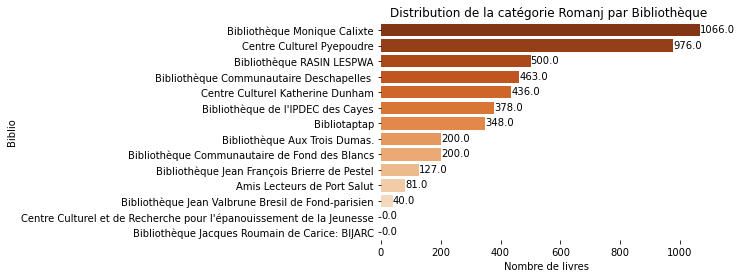

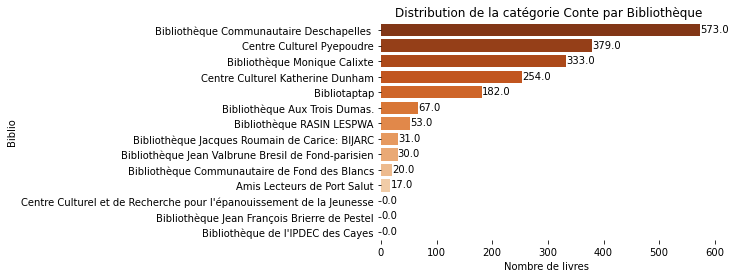

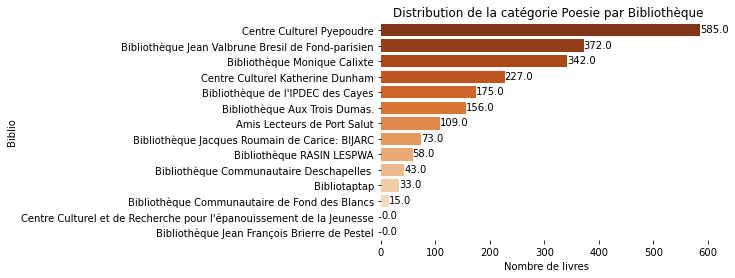

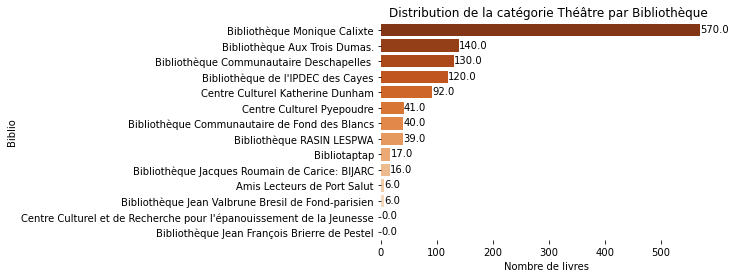

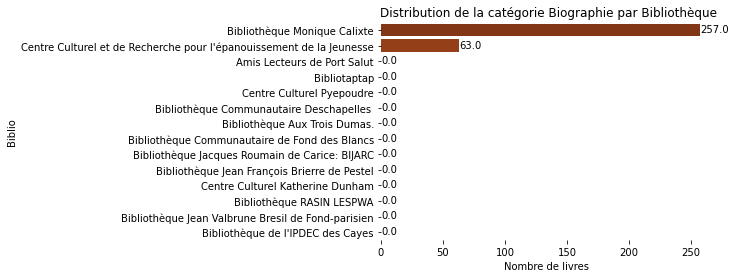

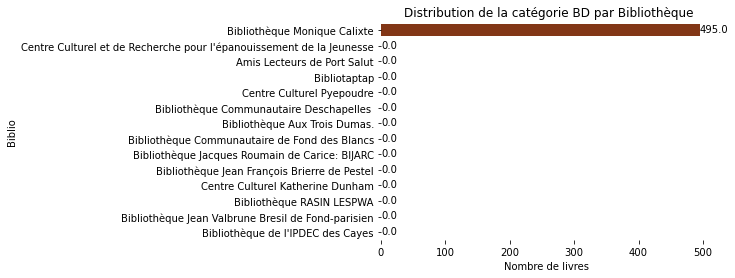

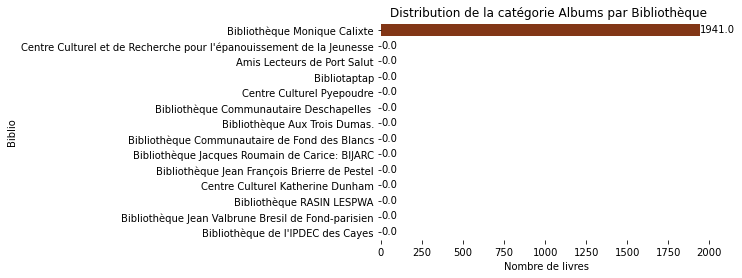

In [40]:
#Distribution en quantité réelle
for i in listet2:
    df2=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_kantite(i,'Biblio',df2,'Distribution de la catégorie {} par Bibliothèque'.format(i))   

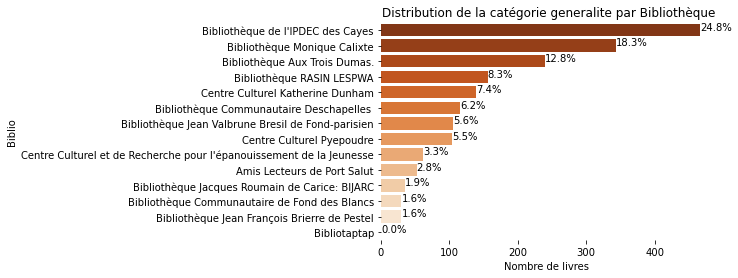

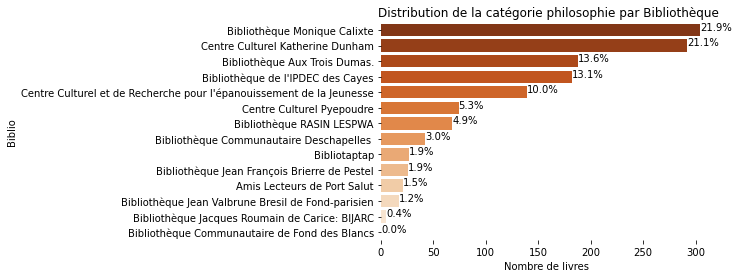

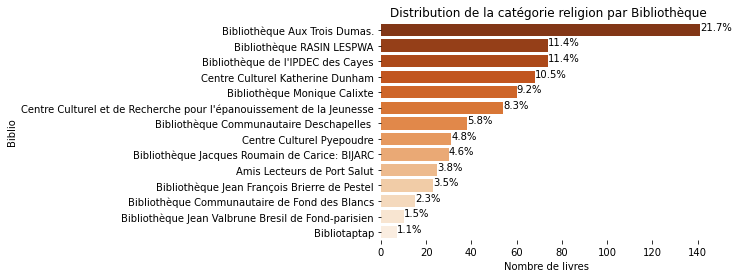

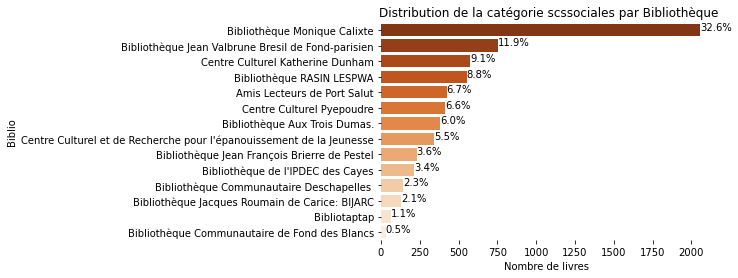

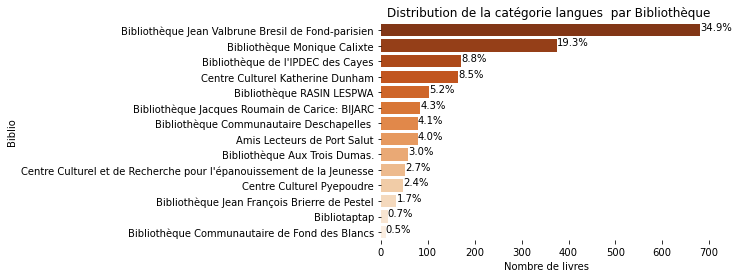

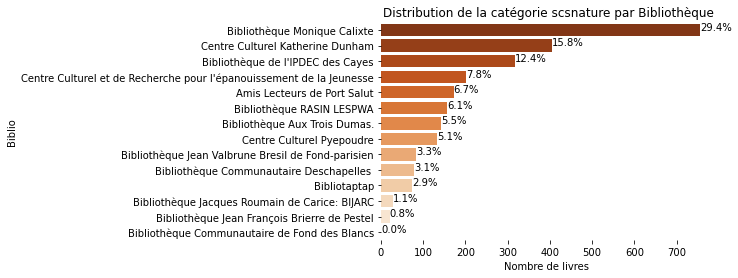

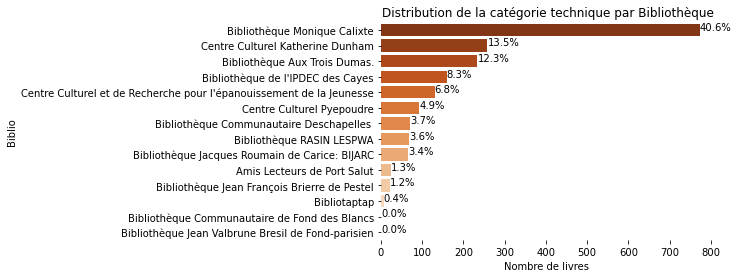

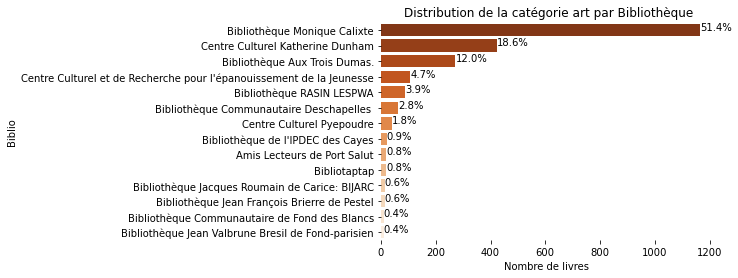

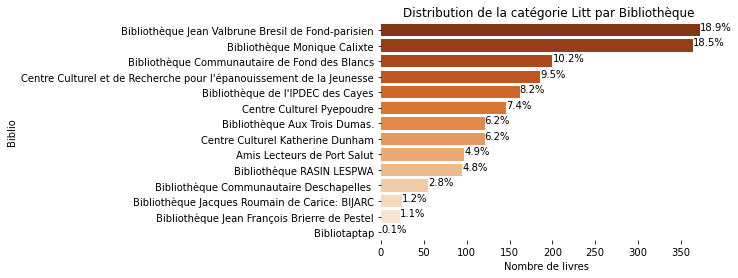

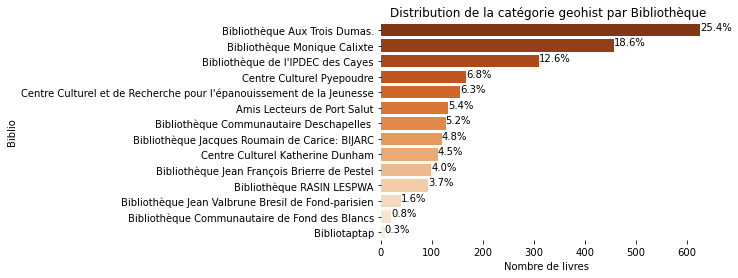

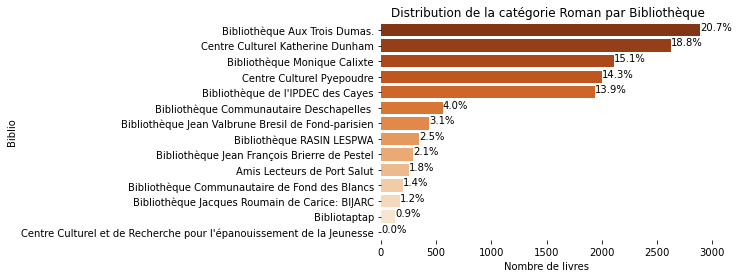

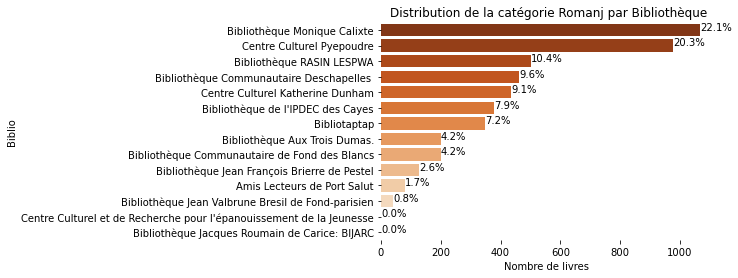

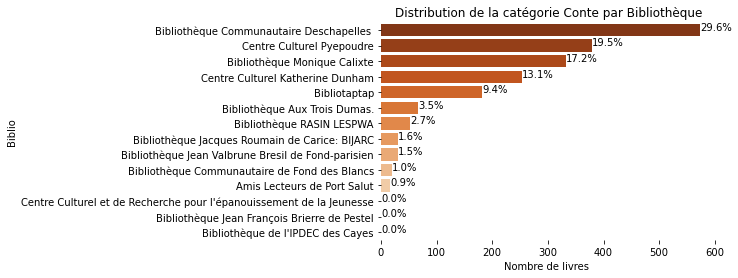

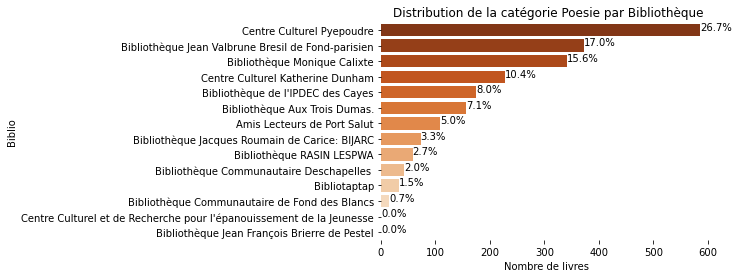

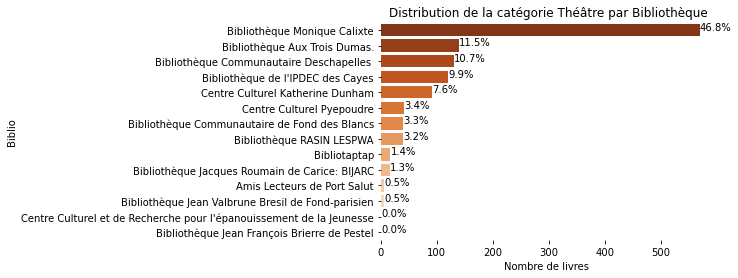

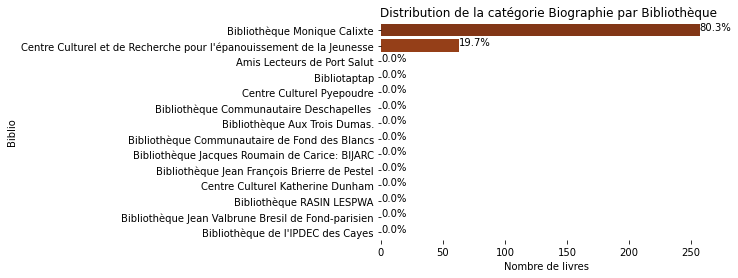

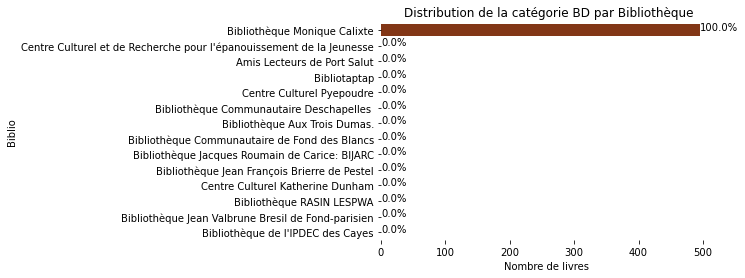

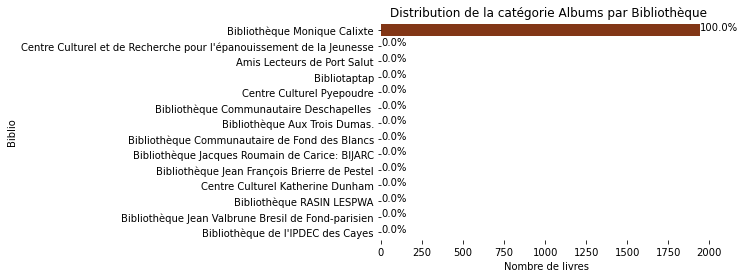

In [41]:
#Distribution en pourcentage
for i in listet2:
    df2=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_pousantaj(i,'Biblio',df2,'Distribution de la catégorie {} par Bibliothèque'.format(i))   

#### Distribution Categorie haitienne par Biblio

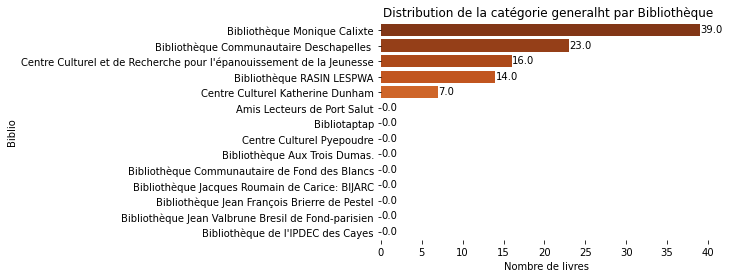

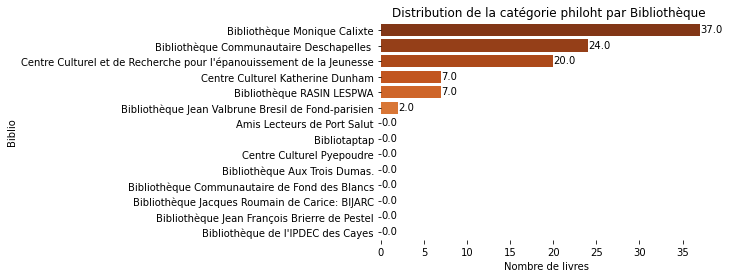

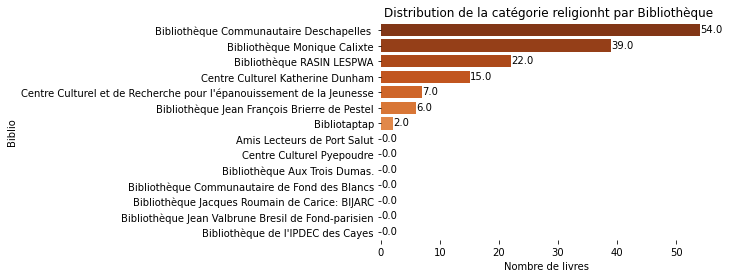

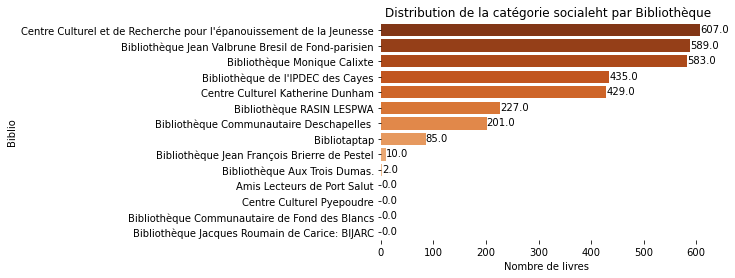

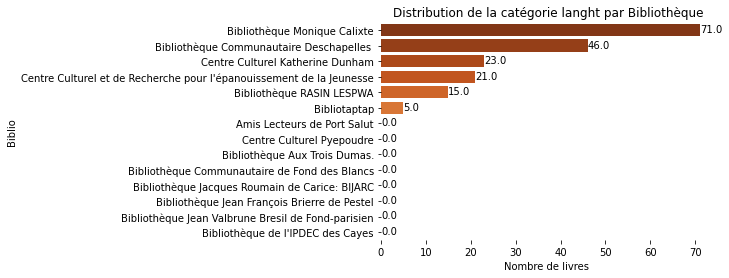

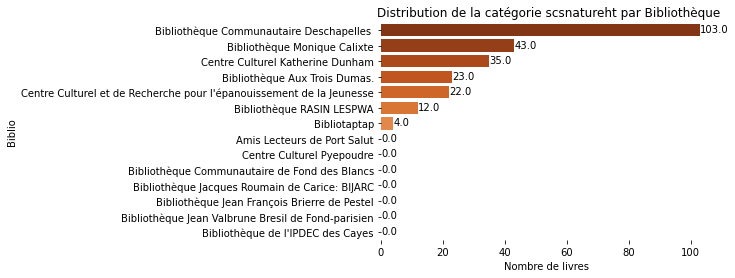

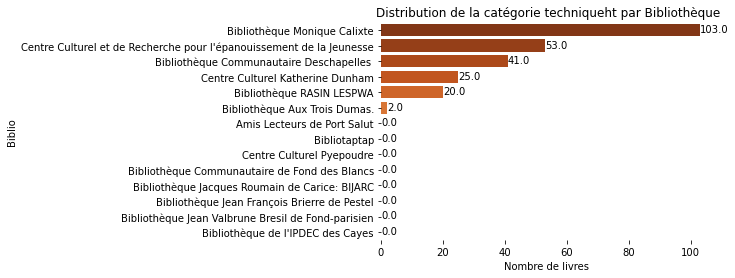

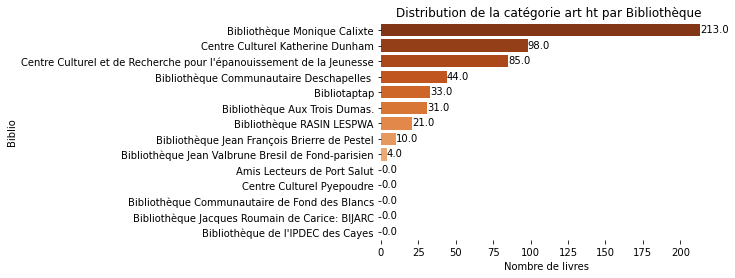

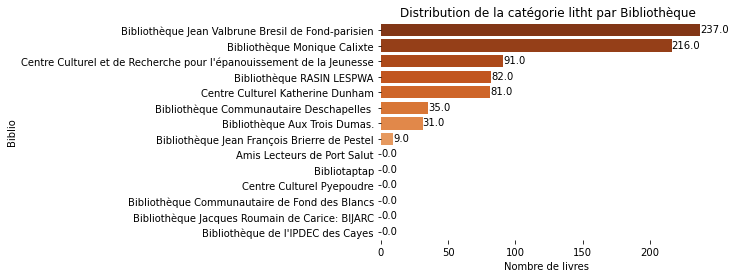

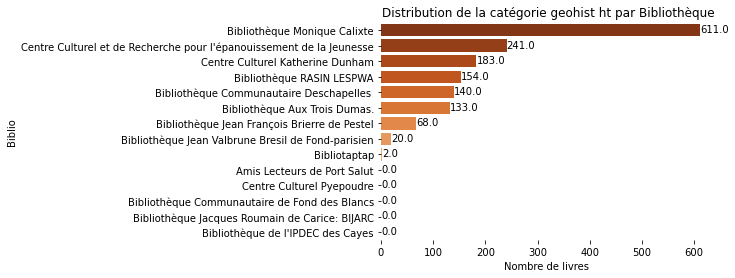

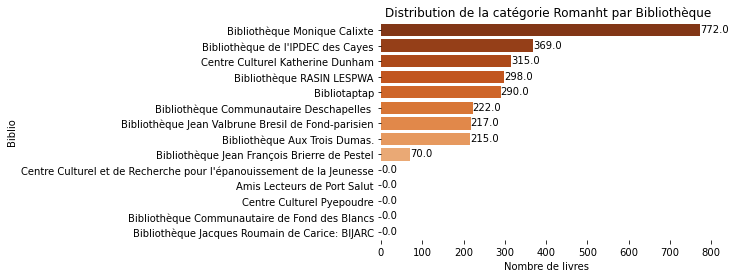

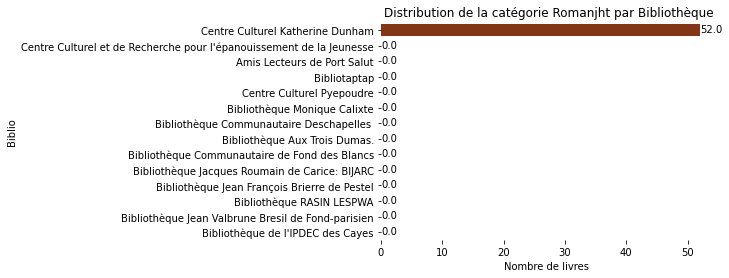

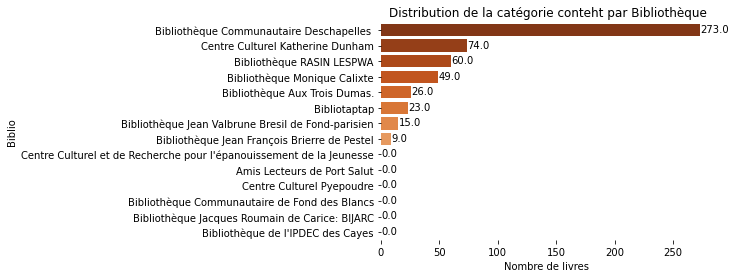

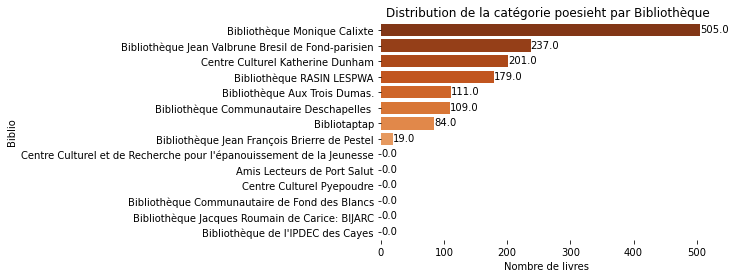

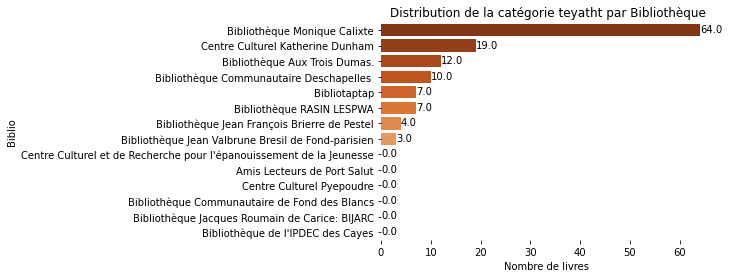

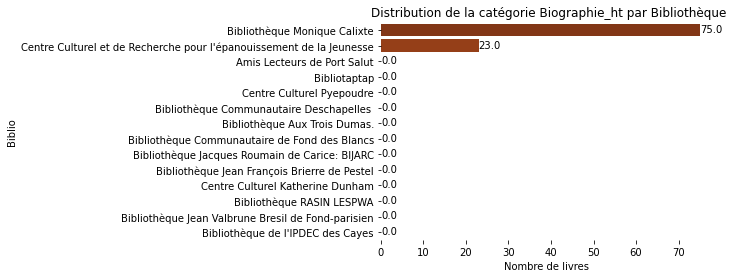

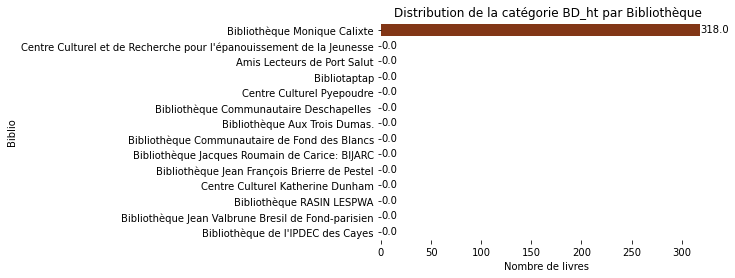

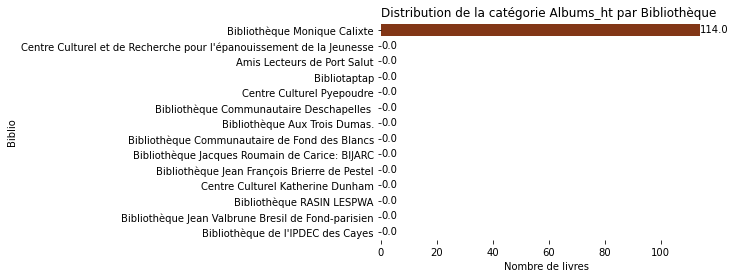

In [45]:
#Distribution en quantité réelle
for i in listht2:
    df2=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_kantite(i,'Biblio',df2,'Distribution de la catégorie {} par Bibliothèque'.format(i))   

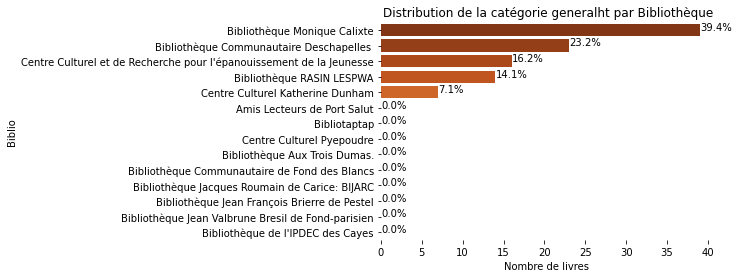

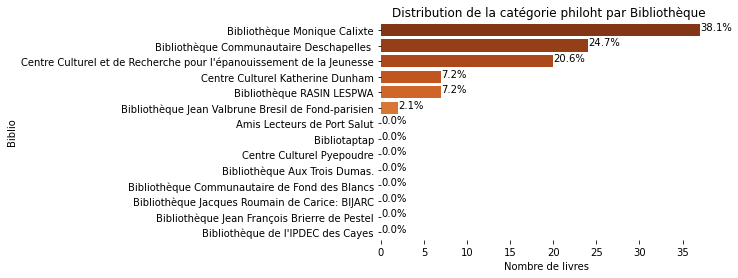

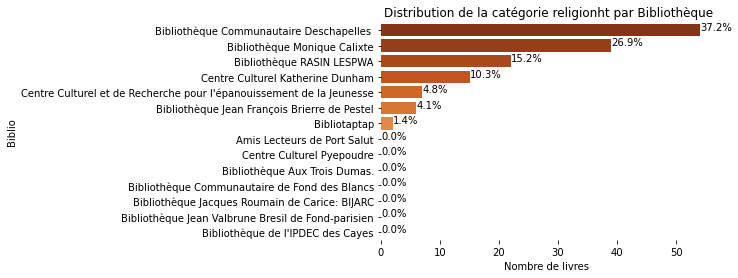

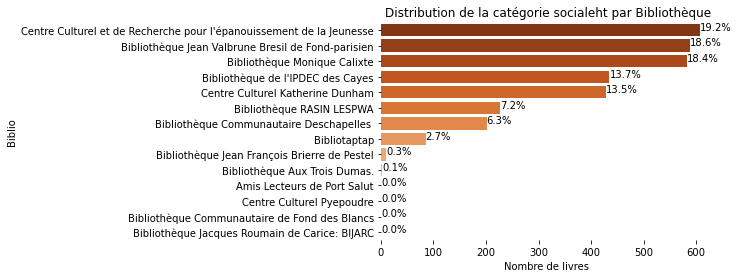

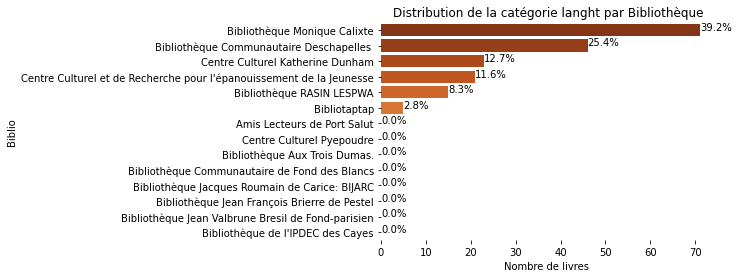

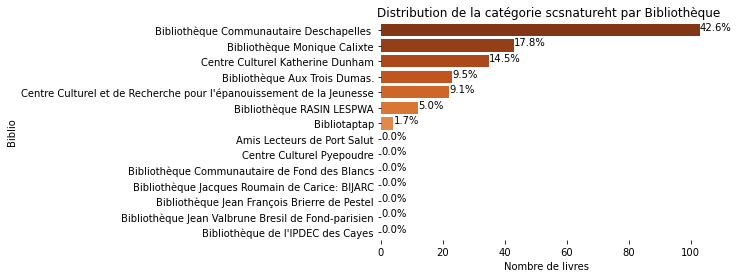

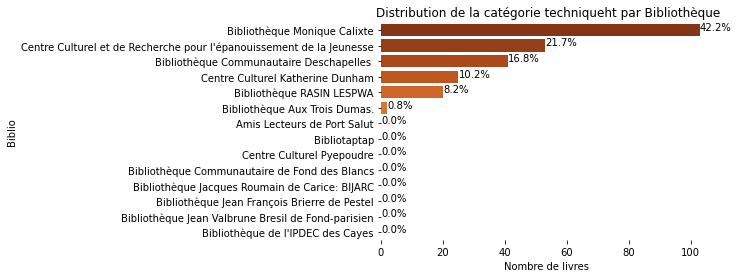

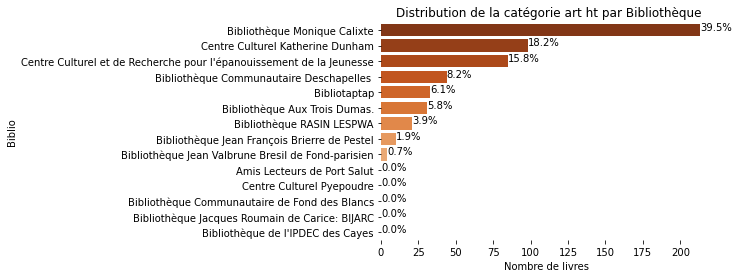

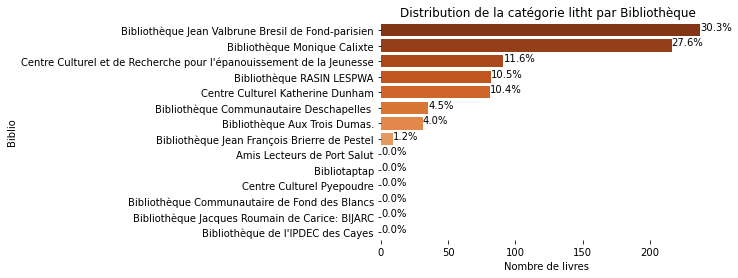

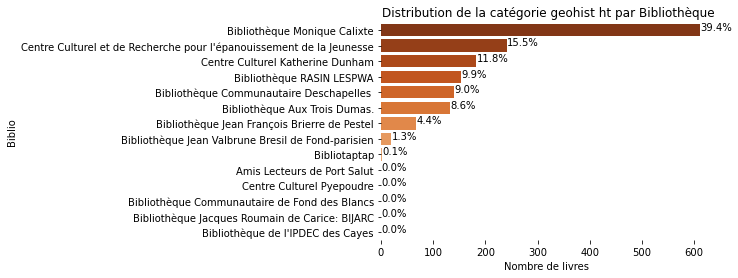

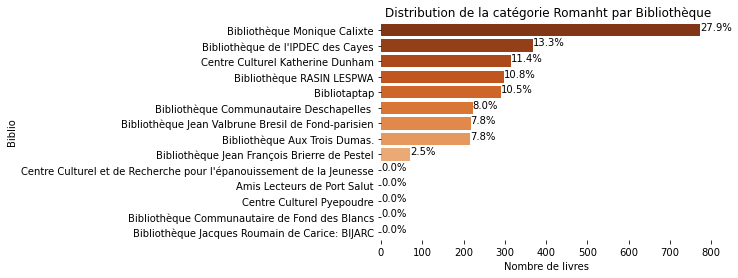

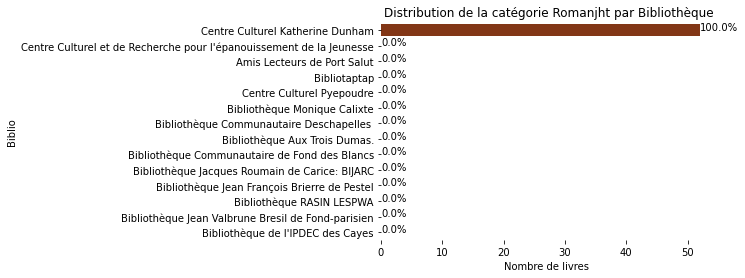

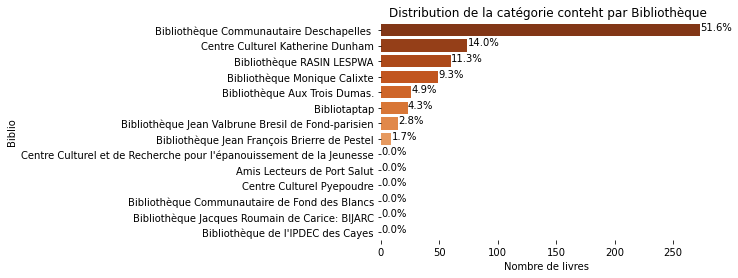

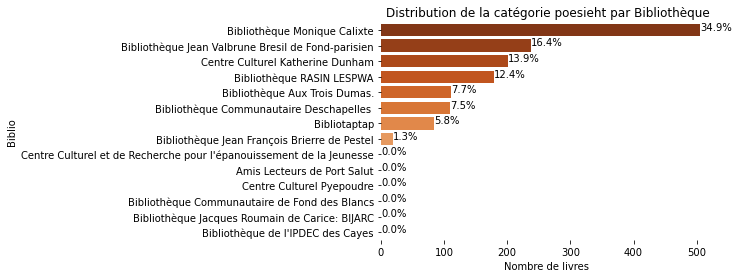

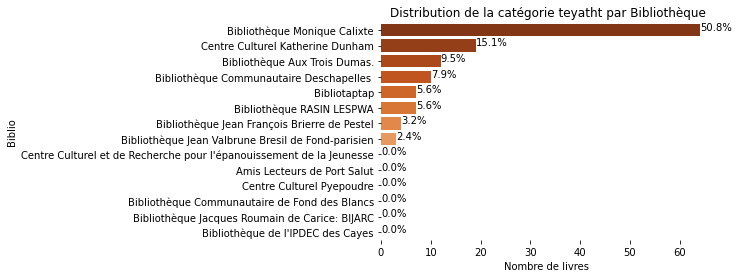

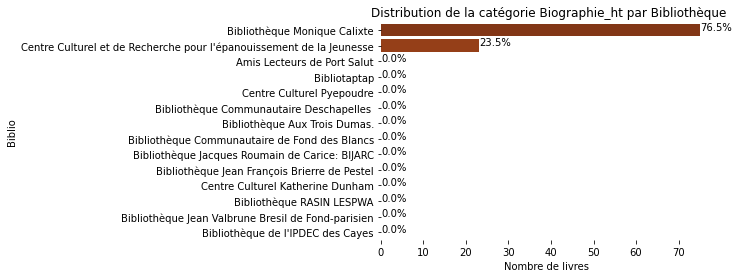

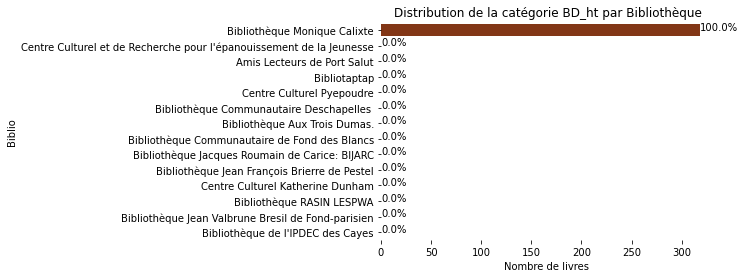

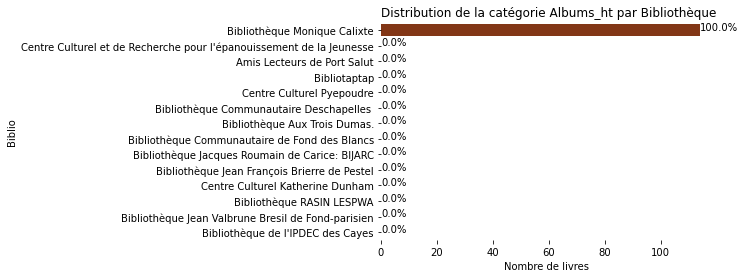

In [46]:
#Distribution en pourcentage
for i in listht2:
    df2=df1.sort_values(by=i, ascending=False)
    del_kategori_nil(df,x,df1)
    plt.figure()
    bar_pousantaj(i,'Biblio',df2,'Distribution de la catégorie {} par Bibliothèque'.format(i))   

#### Distribution des livres dans chaque biblio

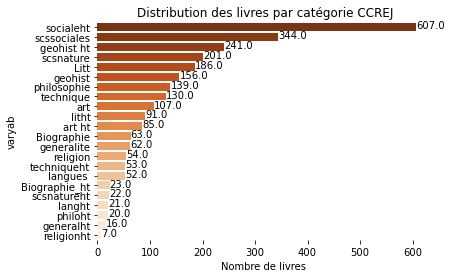

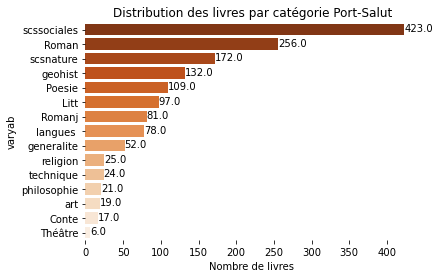

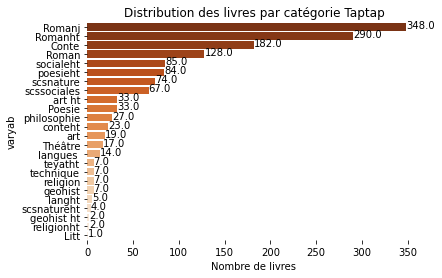

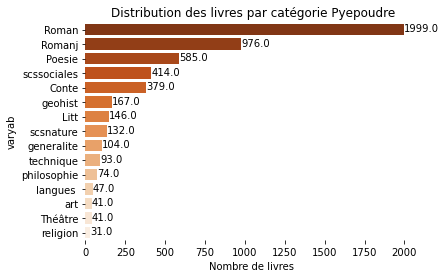

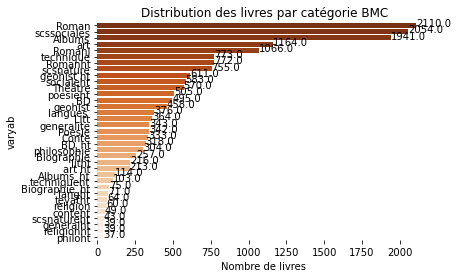

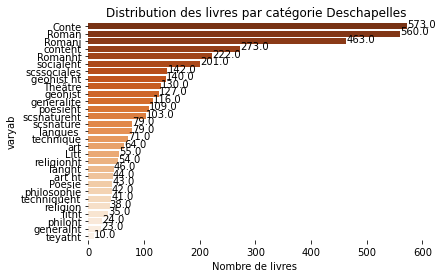

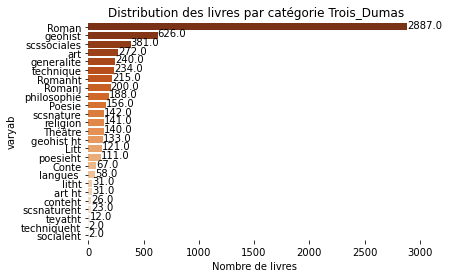

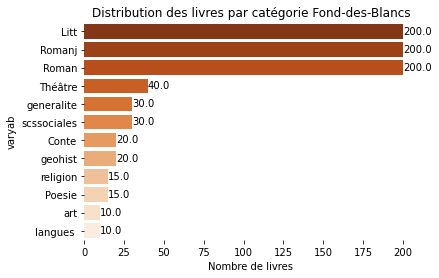

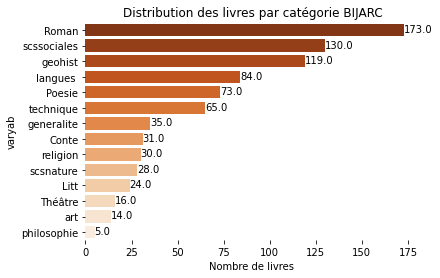

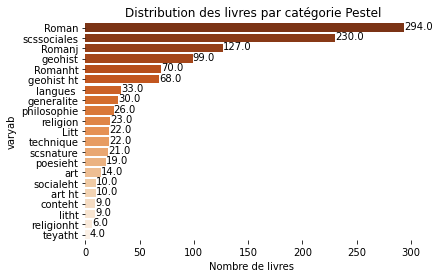

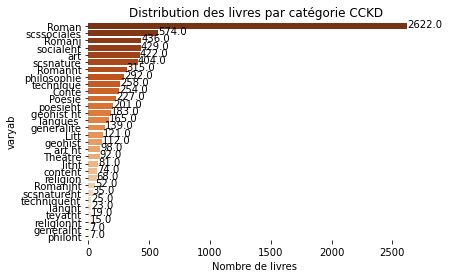

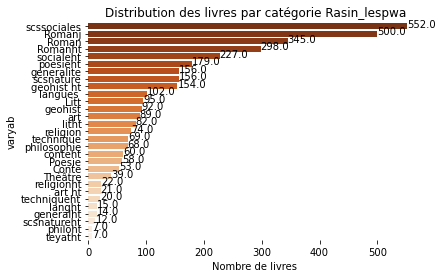

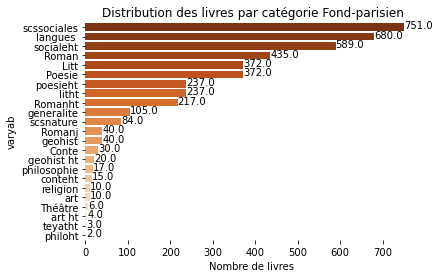

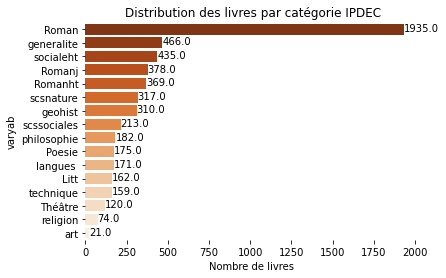

In [77]:
#Distribution en quantité réelle
for i in colbiblio2:
    df2=df6.sort_values(by=i, ascending=False)
    dfindex=df2[df2[i]==0].index
    df1=df2.drop(dfindex)
    plt.figure()
    bar_kantite(i,'varyab',df1,'Distribution des livres par catégorie {}'.format(i))   

#### Distribution de la collection haitienne de chaque biblio

In [111]:
#Distribution en quantité réelle
#for i in colbiblio2:
#    df2=dfht.sort_values(by=i, ascending=False)
#    dfindex=df2[df2[i]==0].index
#    df1=df2.drop(dfindex)
#    plt.figure()
 #   bar_kantite(i,'varyab',df1,'Distribution de la collect haitienne par catégorie {}'.format(i))   